# week2 授業課題1 二次元配列と勾配問題

## 【問題1】1次関数

In [1]:
import numpy as np

x_array_origin = np.arange(-50,50.1,0.1)
x_array = x_array_origin.reshape(1001,1)
print(x_array_origin.shape)

y_array_origin = 0.5*x_array +1
y_array = y_array_origin.reshape(1001,1)
print(y_array.shape)
#print(y_array)

print(len(x_array))
print(len(y_array))

(1001,)
(1001, 1)
1001
1001


## 【問題2】配列の結合

In [2]:
z_origin = np.hstack((x_array,y_array))
print(z_origin)
print(z_origin.shape)

[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]
(1001, 2)


## 【問題3】勾配を求める

In [3]:
slice_x_pre = x_array[1:]
slice_x_post = x_array[:-1]
d_x = slice_x_pre - slice_x_post

slice_y_pre = y_array[1:]
slice_y_post = y_array[:-1]
d_y = slice_y_pre - slice_y_post

slope = d_y/d_x
print(slope.shape)

(1000, 1)


## 【問題4】グラフを描く

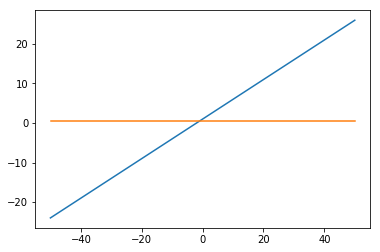

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_array, y_array)
plt.plot(x_array[1:], slope)
plt.show()
#print(x_array.shape)

## 【問題5】Pythonの関数化

In [39]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    """
    変化量を使い勾配を計算する。
    Parameters
    ----------------
    function : function
    求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。
    x_range : tuple
    np.arange()の引数と同じ方法で範囲を指定する。

    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
    xとyを結合したもの。nはx_rangeに依存する。
    gradient : ndarray, shape(n-1,)
    関数の勾配。差をとるため要素は1つ減る
    """
    x_array_origin = np.arange(x_range[0],x_range[1],x_range[2])
    span =int(np.round((x_range[1]-x_range[0])/x_range[2]))
    x_array = x_array_origin.reshape(span,1)
    y_array = function(x_array).reshape(span,1)
    array_xy = np.hstack((x_array,y_array))
    
    slice_x_pre = x_array[1:]
    slice_x_post = x_array[:-1]
    d_x = slice_x_pre - slice_x_post

    slice_y_pre = y_array[1:]
    slice_y_post = y_array[:-1]
    d_y = slice_y_pre - slice_y_post

    gradient = d_y/d_x
    
    return array_xy, gradient

(1000,)


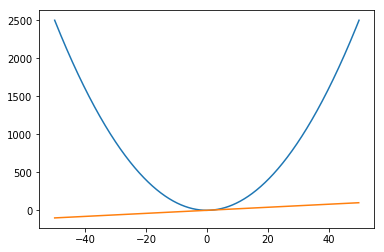

In [91]:
def function1(array_x):

    array_y = array_x **2

    return array_y

array_xy, gradient = compute_gradient(function1)
plt.plot(array_xy[:,0], array_xy[:,1])
print(gradient[:,0].shape)
plt.plot(array_xy[:-1,0], gradient[:,0])
plt.show()

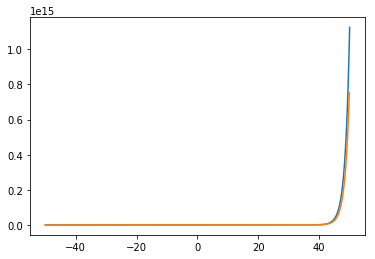

In [92]:
def function2(array_x):

    array_y = 2 * (array_x **2) + 2 ** array_x

    return array_y

array_xy, gradient = compute_gradient(function2)
plt.plot(array_xy[:,0], array_xy[:,1])
plt.plot(array_xy[:-1,0], gradient[:,0])
plt.show()

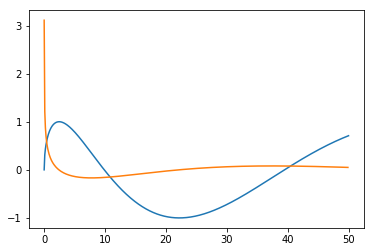

In [93]:
def function3(array_x):

    array_y = np.sin(array_x **(1/2)) #sin 計算

    return array_y

array_xy, gradient = compute_gradient(function3,x_range=(0, 50.1, 0.1))
plt.plot(array_xy[:,0], array_xy[:,1])
plt.plot(array_xy[:-1,0], gradient[:,0])
plt.show()

## 【問題6】最小値を求める
>問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。

In [106]:
#ndarrayのminメソッド、argminメソッドを用いてください
array_xy_1, gradient1 = compute_gradient(function1)
print("func1 min:",np.min(array_xy_1[:,1]))
print("勾配:",gradient1[np.argmin(array_xy_1[:,1]),0])

array_xy_2, gradient2 = compute_gradient(function2)
print("func2 min:",np.min(array_xy_2[:,1]))
print("勾配:",gradient2[np.argmin(array_xy_2[:,1]),0])

array_xy_3, gradient3 = compute_gradient(function3,x_range=(0, 50.1, 0.1))
print("func3 min:",np.min(array_xy_3[:,1]))
print("勾配:",gradient3[np.argmin(array_xy_3[:,1]),0])

#最小のyをとる前後の勾配を表示してください。

func1 min: 5.048709793414476e-25
勾配: 0.1000000000014225
func2 min: 0.9505505632959851
勾配: 0.024824282409972788
func3 min: -0.9999997540298113
勾配: 0.0004874477930660974
